## Susceptible - Infected - Recovered Modeling##

Model details: https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology

Exercise to see how the ODE solver works.

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [33]:
# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 3, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.4, 0.04 
# A grid of time points (in days)
days = 100
t = np.linspace(0, days, days)

In [34]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

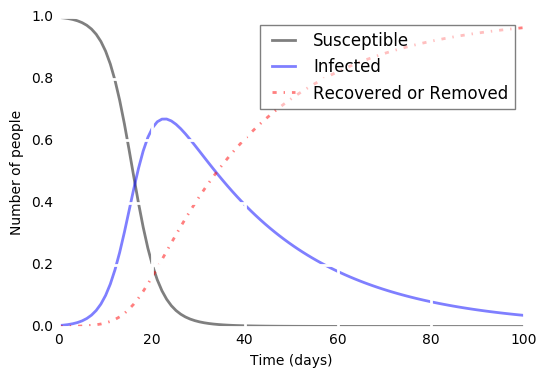

In [35]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')

#ax = fig.add_subplot(111, facecolor ='#dddddd', axisbelow=True)
ax = fig.add_subplot(111)
ax.plot(t, S/N, 'k-', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/N, 'b', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/N, 'r-.', alpha=0.5, lw=2, label='Recovered or Removed')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number of people')
ax.set_ylim(0,1)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)

plt.grid('on')
plt.show()

